In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Veri dosyasını okuyup bir pandas DataFrame'e yüklüyoruz.
df_diabets = pd.read_csv('data/diabetes_clean.csv')

# BMI (vücut kitle indeksi) sıfır olan veya glikoz değeri sıfır olan satırları filtreliyoruz.
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
# Filtrelenen satırları orijinal veri setinden çıkartıyoruz.
df_diabets.drop(df_filtered.index, inplace=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayırıyoruz.
X = df_diabets.drop('glucose', axis=1).values  # Glikoz değerini hedef değişken olarak çıkarıyoruz.
y = df_diabets['glucose'].values  # Glikoz değerlerini hedef değişken olarak seçiyoruz.

# Veriyi eğitim ve test seti olarak ikiye bölüyoruz (%80 eğitim, %20 test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regresyon modelinin farklı alpha değerleriyle performansını saklamak için bir liste oluşturuyoruz.
scores = []
# Farklı alpha değerleri için döngü başlatıyoruz.
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    # Ridge regresyon modelini tanımlıyoruz ve alpha parametresini belirtiyoruz.
    ridge = Ridge(alpha=alpha)
    # Modeli eğitim setiyle eğitiyoruz.
    ridge.fit(X_train, y_train)
    # Modelin test seti üzerindeki tahminlerini yapıyoruz.
    y_pred = ridge.predict(X_test)
    # Modelin performans skorunu (R^2) test seti üzerinde hesaplayıp listeye ekliyoruz.
    scores.append(ridge.score(X_test, y_test))

# Farklı alpha değerleri için hesaplanan skorları gösteriyoruz.
scores


[0.32825526615552425,
 0.3280240795994781,
 0.3252049078298792,
 0.28836032637802334,
 0.20299309688977707]

In [3]:
from sklearn.linear_model import Lasso

# Lasso regresyon modelinin farklı alpha değerleriyle performansını saklamak için bir liste oluşturuyoruz.
scores = []
# Farklı alpha değerleri için döngü başlatıyoruz.
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    # Lasso regresyon modelini tanımlıyoruz ve alpha parametresini belirtiyoruz.
    lasso = Lasso(alpha=alpha)
    # Modeli eğitim setiyle eğitiyoruz.
    lasso.fit(X_train, y_train)
    # Modelin test seti üzerindeki tahminlerini yapıyoruz.
    y_pred = lasso.predict(X_test)
    # Modelin performans skorunu (R^2) test seti üzerinde hesaplayıp listeye ekliyoruz.
    scores.append(lasso.score(X_test, y_test))

# Farklı alpha değerleri için hesaplanan skorları gösteriyoruz.
scores


[0.3284857694292622,
 0.3166121180165745,
 0.17121386697851626,
 0.156847521532139,
 0.11477890284329806]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'pregnancies'),
  Text(1, 0, 'diastolic'),
  Text(2, 0, 'triceps'),
  Text(3, 0, 'insulin'),
  Text(4, 0, 'bmi'),
  Text(5, 0, 'dpf'),
  Text(6, 0, 'age'),
  Text(7, 0, 'diabetes')])

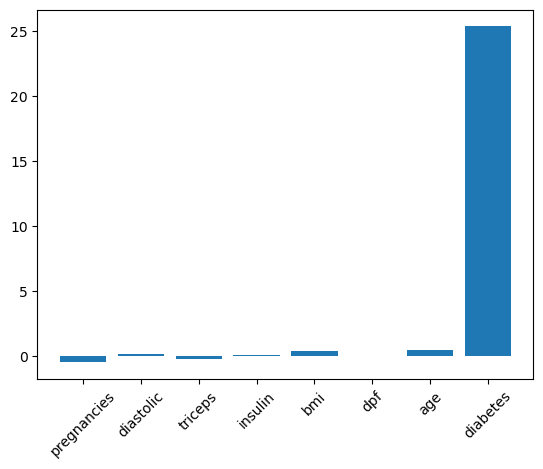

In [5]:
import matplotlib.pyplot as plt

# Veri dosyasını okuyup bir pandas DataFrame'e yüklüyoruz.
df_diabets = pd.read_csv('data/diabetes_clean.csv')

# BMI (vücut kitle indeksi) sıfır olan veya glikoz değeri sıfır olan satırları filtreliyoruz.
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
# Filtrelenen satırları orijinal veri setinden çıkartıyoruz.
df_diabets.drop(df_filtered.index, inplace=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayırıyoruz.
X = df_diabets.drop('glucose', axis=1).values  # Glikoz değerini hedef değişken olarak çıkarıyoruz.
y = df_diabets['glucose'].values  # Glikoz değerlerini hedef değişken olarak seçiyoruz.

# Özellik isimlerini saklıyoruz (glucose hariç).
names = df_diabets.drop('glucose', axis=1).columns

# Lasso modelini alpha=0.1 ile tanımlıyoruz.
lasso = Lasso(alpha=0.1)
# Modeli tüm veriyi kullanarak eğitiyoruz ve katsayıları alıyoruz.
lasso_coef = lasso.fit(X, y).coef_

# Özellik katsayılarını bir çubuk grafikte görselleştiriyoruz.
plt.bar(names, lasso_coef)  # Özelliklerin katsayılarını çubuk grafik olarak çiziyoruz.
plt.xticks(rotation=45)  # X eksenindeki etiketlerin yönünü 45 derece döndürüyoruz.


In [7]:
# Gerekli kütüphaneleri yüklüyoruz.
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Veri dosyasını okuyup bir pandas DataFrame'e yüklüyoruz.
df_churn = pd.read_csv("data/telecom_churn_clean.csv")

# Bağımsız değişkenler (X) olarak total_day_charge ve total_eve_charge sütunlarını seçiyoruz.
X = df_churn[['total_day_charge', 'total_eve_charge']].values
# Bağımlı değişken (y) olarak churn sütununu seçiyoruz.
y = df_churn['churn'].values

# Veriyi eğitim ve test seti olarak ikiye bölüyoruz (%80 eğitim, %20 test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN (K-Nearest Neighbors) sınıflandırıcıyı 7 komşu ile tanımlıyoruz.
knn = KNeighborsClassifier(n_neighbors=7)

# Modeli eğitim setiyle eğitiyoruz.
knn.fit(X_train, y_train)

# Test seti üzerinde tahminler yapıyoruz.
y_pred = knn.predict(X_test)

# Gerçek ve tahmin edilen değerler için karışıklık matrisini (confusion matrix) hesaplıyoruz.
confusion_matrix(y_test, y_pred)


array([[548,  18],
       [ 69,  32]])

In [11]:
# Gerekli kütüphaneleri yüklüyoruz.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Veri dosyasını okuyup bir pandas DataFrame'e yüklüyoruz.
df_churn = pd.read_csv("data/telecom_churn_clean.csv")

# Bağımsız değişkenler (X) olarak total_day_charge ve total_eve_charge sütunlarını seçiyoruz.
X = df_churn[['total_day_charge', 'total_eve_charge']].values
# Bağımlı değişken (y) olarak churn sütununu seçiyoruz.
y = df_churn['churn'].values

# Veriyi eğitim ve test seti olarak ikiye bölüyoruz (%80 eğitim, %20 test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modelini tanımlıyoruz.
model_log = LogisticRegression()
# Modeli eğitim setiyle eğitiyoruz.
model_log.fit(X_train, y_train)

# Test seti üzerinde tahminler yapıyoruz.
y_predict = model_log.predict(X_test)


Text(0.5, 1.0, 'Logistic Regression ROC Curve')

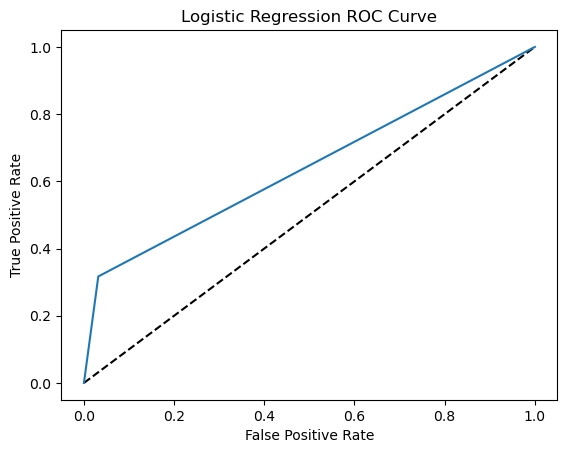

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC eğrisini hesaplamak için roc_curve fonksiyonunu kullanıyoruz.
# y_test: Gerçek sınıf değerleri.
# y_pred_probs: Pozitif sınıfa ait tahmin olasılıkları.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Rastgele tahmin modelini göstermek için 'y = x' doğrusu çiziyoruz (kırık çizgi).
plt.plot([0, 1], [0, 1], 'k--')

# ROC eğrisini çiziyoruz (FPR ve TPR değerlerini kullanarak).
plt.plot(fpr, tpr)

# Grafiğe eksen etiketlerini ekliyoruz.
plt.xlabel('False Positive Rate')  # Yanlış Pozitif Oranı (FPR): Negatif sınıfı pozitif olarak tahmin etme oranı.
plt.ylabel('True Positive Rate')  # Doğru Pozitif Oranı (TPR): Pozitif sınıfı doğru tahmin etme oranı.
plt.title('Logistic Regression ROC Curve')  # Grafiğe başlık ekliyoruz.

# Bu grafik, modelin farklı eşik değerlerinde (thresholds) nasıl bir performans gösterdiğini görselleştirir.


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import numpy as np 

# Veri dosyasını okuyup bir pandas DataFrame'e yüklüyoruz.
df_diabets = pd.read_csv('data/diabetes_clean.csv')

# BMI (vücut kitle indeksi) sıfır olan veya glikoz değeri sıfır olan satırları filtreliyoruz.
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
# Filtrelenen satırları orijinal veri setinden çıkartıyoruz.
df_diabets.drop(df_filtered.index, inplace=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayırıyoruz.
X = df_diabets.drop('glucose', axis=1).values  # Glikoz değerini hedef değişken olarak çıkarıyoruz.
y = df_diabets['glucose'].values  # Glikoz değerlerini hedef değişken olarak seçiyoruz.

# Veriyi eğitim ve test seti olarak ikiye bölüyoruz (%80 eğitim, %20 test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold çapraz doğrulama için ayarları yapıyoruz.
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 katmanlı çapraz doğrulama, verileri karıştırarak.

# Ridge regresyon modeli için hiperparametre aralığını belirtiyoruz.
param_grid = {
    'alpha': np.arange(0.0001, 1, 10),  # 'alpha' (ceza katsayısı) için bir aralık belirleniyor.
    'solver': ['sag', 'lsqr']  # Ridge modelinin çözüm algoritmaları: 'sag' ve 'lsqr'.
}

# Ridge regresyon modelini oluşturuyoruz.
ridge = Ridge()

# GridSearchCV ile en iyi parametreleri bulmak için Ridge modelini tarıyoruz.
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)  # GridSearchCV kullanılarak çapraz doğrulama yapılıyor.

# Eğitim seti üzerinde hiperparametre taramasını gerçekleştiriyoruz.
ridge_cv.fit(X_train, y_train)

# En iyi parametreler ve en iyi doğrulama skorunu görüntülüyoruz.
(ridge_cv.best_params_, ridge_cv.best_score_)


/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'alpha': 0.0001, 'solver': 'lsqr'}, 0.3404176885506861)

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# İsteğe bağlı olarak, test edilen hiperparametre değerlerinin sayısını belirleyen n_iter bağımsız değişkenini ayarlanabilir. 
# Böylece n_iter iki olarak ayarlandığında beş katlı çapraz doğrulama 10 fit() gerçekleştirir. 
# RandomizedSearchCV kullanarak hiperparametre optimizasyonu yapıyoruz.
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)  # n_iter ile test edilecek hiperparametre kombinasyonu sayısını sınırlandırıyoruz.
ridge_cv.fit(X_train, y_train)  # Eğitim seti üzerinde optimizasyonu gerçekleştiriyoruz.

# En iyi hiperparametreler ve çapraz doğrulama skoru
(ridge_cv.best_params_, ridge_cv.best_score_)


/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'solver': 'lsqr', 'alpha': 0.0001}, 0.3404176885506861)

In [21]:
import pandas as pd

df_music = pd.read_csv('data/music_genre.csv')
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       44996 non-null  int64  
 1   popularity        44996 non-null  int64  
 2   acousticness      44996 non-null  float64
 3   danceability      44996 non-null  float64
 4   duration_ms       44996 non-null  int64  
 5   energy            44996 non-null  float64
 6   instrumentalness  44996 non-null  float64
 7   liveness          44996 non-null  float64
 8   loudness          44996 non-null  float64
 9   speechiness       44996 non-null  float64
 10  tempo             44996 non-null  float64
 11  valence           44996 non-null  float64
 12  music_genre       44996 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.5+ MB


<Axes: xlabel='music_genre', ylabel='popularity'>

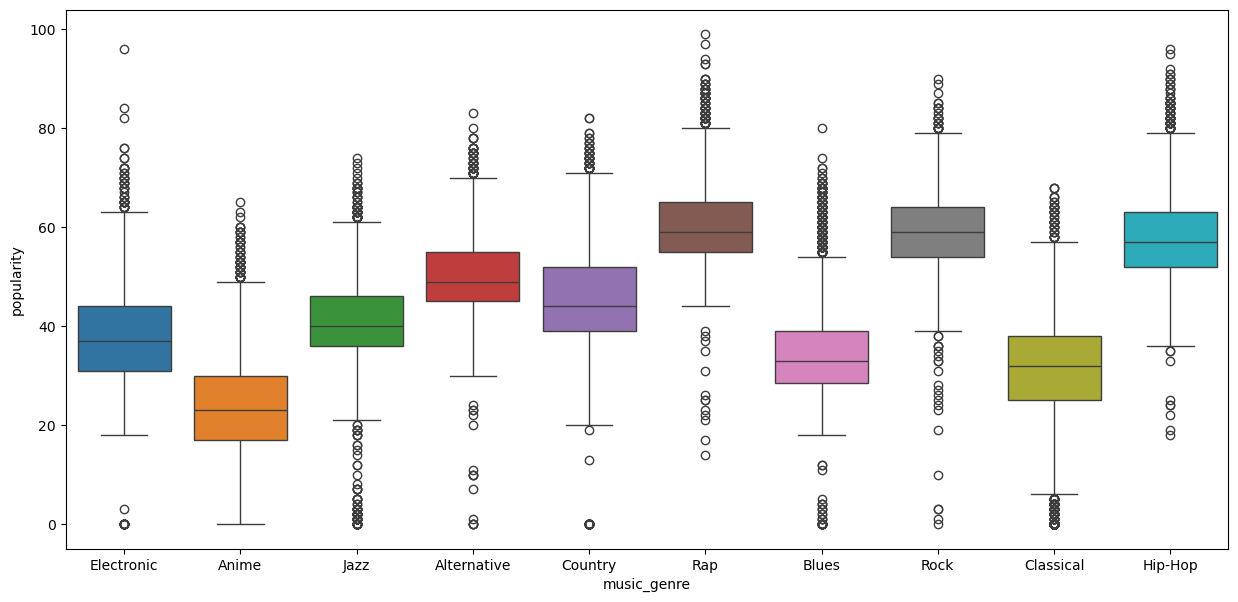

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_music, x='music_genre', y='popularity', hue='music_genre')

### Kutu Grafiği (Boxplot) Açıklaması

Bu kod, Seaborn kütüphanesi ve Matplotlib ile bir **boxplot** (kutu grafiği) oluşturur. Boxplot, bir veri kümesinin dağılımını görselleştirmek için kullanılan bir araçtır. Genellikle medyan, çeyrekler arası aralık (IQR), uç noktalar (outliers) gibi istatistiksel verileri görmek için kullanılır.

#### Kodun Adım Adım Açıklaması:

1. **`plt.figure(figsize=(15, 7))`**:
   - Bu satır, grafiğin boyutlarını belirler. `figsize=(15, 7)` parametresi, grafiğin genişliğini 15 birim, yüksekliğini ise 7 birim olarak ayarlar.

2. **`sns.boxplot()`**:
   - **`sns.boxplot`**: Seaborn'un boxplot fonksiyonu ile kutu grafiği oluşturuluyor.
   
   - **`data=df_music`**: Grafikte kullanılacak veri setini belirtir. Bu örnekte, veri seti **`df_music`** olarak adlandırılmıştır.
   
   - **`x='music_genre'`**: X ekseninde **`music_genre`** (müzik türü) yer alacak. Bu, her bir müzik türü için bir boxplot oluşturulmasını sağlar.
   
   - **`y='popularity'`**: Y ekseninde **`popularity`** (popülerlik) yer alacak. Bu, müzik türlerinin popülerlik değerlerini gösterir.
   
   - **`hue='music_genre'`**: Kutu grafiğinin rengini **`music_genre`** (müzik türü) kategorilerine göre ayarlamak için **`hue`** parametresi kullanılır. Böylece her müzik türü için kutu grafiği farklı renklerle görselleştirilir.

3. **Grafiği Görselleştirme**:
   - **`plt.show()`**: Grafik, belirlenen parametreler ve verilerle ekranda gösterilir.

#### Grafikle İlgili İpuçları:

- **Kutu**: Verinin %50'sinin, yani 1. çeyrek (Q1) ile 3. çeyrek (Q3) arasında kalan kısmını gösterir. Kutunun içindeki çizgi, verinin medyanını belirtir.
- **Whiskerlar**: Kutu grafiğinin üst ve alt uçlarındaki çizgiler, veri setindeki uç noktaları (outliers hariç) gösterir.
- **Outliers (uç noktalar)**: Kutu grafiğinde kutunun dışında kalan noktalar, uç noktaları temsil eder.

#### Özet:
Bu kod, farklı müzik türlerinin popülerlik değerlerinin dağılımını gösteren bir kutu grafiği oluşturur. Müzik türlerini ve onların popülerlik değerlerini daha iyi anlamak için bu tür görselleştirmeler faydalıdır.


---

In [27]:
music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')
music_dummies.head()

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


### `pd.get_dummies` ile Kategorik Verileri Sayısal Hale Getirme

Bu kod, pandas kütüphanesindeki **`get_dummies`** fonksiyonunu kullanarak kategorik bir sütunu (bu örnekte `music_genre` sütunu) sayısal verilere dönüştürür. Bu işlem, **one-hot encoding** olarak adlandırılır ve makine öğrenmesi algoritmalarında kategorik verilerle çalışırken sıklıkla kullanılır.

#### Kodun Açıklaması:

1. **`music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')`**:
   - **`df_music['music_genre']`**: `df_music` veri setindeki **`music_genre`** sütunu, müzik türlerini içeren kategorik bir veri sütunudur.
   - **`pd.get_dummies()`**: Bu fonksiyon, verilen sütunu sayısal verilere dönüştürür. Yani her benzersiz kategori için yeni bir sütun ekler ve bu sütunlarda **1** veya **0** değerleri yer alır (1: ilgili kategori mevcut, 0: ilgili kategori mevcut değil).
   - **`drop_first=True`**: Bu parametre, ilk sütunun düşürülmesini sağlar. Bu, "dummy variable trap" (çoklu doğrusal bağlılık) sorununu önler. İlk sütunun düşürülmesi, modelin gereksiz şekilde yüksek korelasyonlardan etkilenmesini engeller.
   - **`dtype='int'`**: Yeni oluşturulan sütunlar, **tamsayı** türünde olacak şekilde belirtilir.

2. **`music_dummies.head()`**:
   - Bu satır, `music_dummies` veri çerçevesinin ilk 5 satırını görüntüler. Bu, kodun doğru çalışıp çalışmadığını kontrol etmek için faydalıdır.


#### Özet:
Bu kod, **`music_genre`** sütunundaki kategorik verileri sayısal verilere dönüştürmek için **one-hot encoding** kullanır. Bu dönüşüm, modelin müzik türlerine dayalı öngörüler yapabilmesini sağlar.


---

In [31]:
music_dummies = pd.concat([df_music, music_dummies], axis=1)
music_dummies

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,music_genre,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,32894,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,...,Electronic,0,0,0,0,1,0,0,0,0
1,46652,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,...,Electronic,0,0,0,0,1,0,0,0,0
2,30097,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,...,Electronic,0,0,0,0,1,0,0,0,0
3,62177,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,...,Electronic,0,0,0,0,1,0,0,0,0
4,24907,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,...,Electronic,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,58878,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44992,43557,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44993,39767,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44994,57944,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,...,Hip-Hop,0,0,0,0,0,1,0,0,0


### `pd.concat` ile Veri Birleştirme

Bu kod, **`pd.concat()`** fonksiyonunu kullanarak orijinal veri seti **`df_music`** ile one-hot encoding yöntemiyle oluşturulmuş olan **`music_dummies`** veri çerçevesini birleştirir. Bu işlem, müzik türlerinin sayısal temsillerini (dummy sütunları) orijinal veri setine ekler.

#### Kodun Açıklaması:

1. **`music_dummies = pd.concat([df_music, music_dummies], axis=1)`**:
   - **`pd.concat()`**: Bu fonksiyon, belirtilen veri çerçevelerini belirtilen eksende (satırlar veya sütunlar) birleştirir.
   - **`[df_music, music_dummies]`**: Bu, birleştirilecek veri çerçevelerini içerir. **`df_music`** orijinal veri setini ve **`music_dummies`** dummy sütunlarını içerir.
   - **`axis=1`**: Bu parametre, veri çerçevelerinin **sütunlar (axis=1)** boyunca birleştirileceğini belirtir. Yani, her iki veri çerçevesinin sütunları yan yana eklenir.

2. **`music_dummies`**:
   - Bu satır, birleştirilmiş veri çerçevesinin sonucunu gösterir. Artık **`df_music`** veri seti, müzik türleri için sayısal sütunlara (dummy sütunları) sahip olacaktır.


#### Özet:
Bu kod, **`df_music`** veri seti ile **`music_dummies`** veri çerçevesini birleştirerek müzik türlerini sayısal verilere dönüştürüp, tüm veriyi tek bir veri setinde toplar. Bu işlem, modelin çalışabilmesi için gerekli olan tüm özellikleri aynı veri setinde birleştirir.


---

In [35]:
music_dummies = music_dummies.drop(['music_genre', 'instance_id'], axis=1)
music_dummies

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,0,0,0,0,1,0,0,0,0
1,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,0,0,0,0,1,0,0,0,0
2,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,0,0,0,0,1,0,0,0,0
3,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,0,0,0,0,1,0,0,0,0
4,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330,0,0,0,0,0,1,0,0,0
44992,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113,0,0,0,0,0,1,0,0,0
44993,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,0,0,0,0,0,1,0,0,0
44994,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354,0,0,0,0,0,1,0,0,0


### `drop` Fonksiyonu ile Sütun Silme

Bu kod, **`drop()`** fonksiyonu kullanarak **`music_genre`** ve **`instance_id`** sütunlarını **`music_dummies`** veri çerçevesinden siler.

#### Kodun Açıklaması:

1. **`music_dummies = music_dummies.drop(['music_genre', 'instance_id'], axis=1)`**:
   - **`drop()`**: Bu fonksiyon, belirtilen sütunları veya satırları veri çerçevesinden silmek için kullanılır.
   - **`['music_genre', 'instance_id']`**: Bu, silinmesi istenen sütunları belirtir. Bu örnekte **`music_genre`** ve **`instance_id`** sütunları silinmektedir.
   - **`axis=1`**: Bu parametre, sütunların silineceğini belirtir. `axis=0` olsaydı, satırlar silinirdi.

2. **`music_dummies`**:
   - Bu satır, **`music_dummies`** veri çerçevesinin, belirli sütunlar (bu durumda **`music_genre`** ve **`instance_id`**) silindikten sonraki halini döndüren sonucu gösterir.

#### Özet:
Bu kod, **`music_genre`** ve **`instance_id`** sütunlarını **`music_dummies`** veri setinden kaldırarak sadece gerekli sayısal özellikleri tutar. Bu, model için gereksiz olan sütunların kaldırılması amacıyla yapılan bir işlemdir.


---

In [39]:
# Linear regression with dummy variables

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_reg = LinearRegression()
model_reg_cv = cross_val_score(model_reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

np.sqrt(-model_reg_cv)

array([9.55195316, 9.35056784, 9.426638  , 9.61559878, 9.60648301])

### Doğrusal Regresyon ve Dummy Değişkenleri ile Modelleme

Bu kod, **dummy değişkenleri** kullanarak bir **doğrusal regresyon modeli** oluşturur ve **cross-validation** (çapraz doğrulama) ile modelin performansını değerlendirir. Ayrıca, modelin **negatif ortalama kare hatası** (negative mean squared error, MSE) üzerinden doğrulama işlemi yapılır ve daha sonra bu hata değeri **kareköküne** alınır.

#### Kodun Adım Adım Açıklaması:

1. **Veri Seti ve Hedef Değişkenin Belirlenmesi**:
   - **`X = music_dummies.drop('popularity', axis=1).values`**: Bu satır, **`music_dummies`** veri setinden **`popularity`** sütununu çıkararak özellikleri (features) **`X`**'e atar.
   - **`y = music_dummies['popularity'].values`**: Bu satır, **`popularity`** sütununu hedef değişken (target variable) **`y`** olarak belirler.

2. **Veri Setinin Eğitim ve Test Setlerine Bölünmesi**:
   - **`train_test_split(X, y, test_size=0.2, random_state=42)`**: Veri seti %80 eğitim, %20 test olarak ikiye bölünür. **`random_state=42`** sabit bir bölme sağlar, böylece her çalıştırmada aynı veri seti bölünmesi elde edilir.

3. **Çapraz Doğrulama İçin KFold Kullanımı**:
   - **`kf = KFold(n_splits=5, shuffle=True, random_state=42)`**: Bu satırda **KFold** sınıfı ile 5 katmanlı (fold) çapraz doğrulama oluşturulur. **`shuffle=True`**, verilerin karıştırılmasını sağlar.

4. **Modelin Tanımlanması ve Çapraz Doğrulama**:
   - **`model_reg = LinearRegression()`**: Doğrusal regresyon modeli oluşturulur.
   - **`model_reg_cv = cross_val_score(model_reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')`**: **`cross_val_score`** fonksiyonu ile modelin performansı çapraz doğrulama kullanılarak değerlendirilir. Burada **`scoring='neg_mean_squared_error'`** parametresi, modelin ortalama kare hatasını hesaplamak için kullanılır. Ancak **`cross_val_score`**, hata değerlerini negatif olarak döndürdüğü için bu değerler **negatif** olur.

5. **Ortalama Kare Hatasının Karekökünün Hesaplanması**:
   - **`np.sqrt(-model_reg_cv)`**: Çünkü **`cross_val_score`** fonksiyonu negatif hata değerlerini döndürdü, bunları pozitif yapmak için negatif işaret kaldırılır ve ardından **karekök** alınır. Bu işlem, modelin **kök ortalama kare hatası (RMSE)** değerini verir.

#### Özet:
Bu kod, dummy değişkenleriyle yapılan doğrusal regresyon modelinin **kök ortalama kare hatası (RMSE)** değerini çapraz doğrulama kullanarak hesaplar. Çapraz doğrulama, modelin genellenebilirliğini test etmek için veri setini farklı alt gruplara ayırarak doğrulama yapar ve modelin performansını daha güvenilir bir şekilde değerlendirir.
